# DataCo Supply Chain Big Data Analysis

A DataSet of Supply Chains used by the company DataCo Global was used for the analysis. Dataset of Supply Chain , which allows the use of Machine Learning Algorithms and R Software.
Areas of important registered activities : Provisioning , Production , Sales , Commercial Distribution.It also allows the correlation of Structured Data with Unstructured Data for knowledge generation.
The objective of this analysis is to predict late delivery risk that the company faced. 

---

Data Description :
* Type : Type of transaction made
* Days for shipping (real)      : Actual shipping days of the purchased product
* Days for shipment (scheduled) : Days of scheduled delivery of the purchased product
* Benefit per order : Earnings per order placed
* Sales per customer : Total sales per customer made per customer
* Delivery Status : Delivery status of orders: Advance shipping , Late delivery , Shipping canceled , Shipping on time
* Late_delivery_risk            : Categorical variable that indicates if sending is late (1), it is not late (0).
* Category Id : Product category code
* Category Name : Description of the product category
* Customer City : City where the customer made the purchase
* Customer Country : Country where the customer made the purchase
* Customer Email : Customer's email
* Customer Fname : Customer name
* Customer Id : Customer ID
* Customer Lname : Customer lastname
* Customer Password : Masked customer key
* Customer Segment : Types of Customers: Consumer , Corporate , Home Office
* Customer State : State to which the store where the purchase is registered belongs
* Customer Street : Street to which the store where the purchase is registered belongs
* Customer Zipcode : Customer Zipcode
* Department Id : Department code of store
* Department Name : Department name of store
* Latitude : Latitude corresponding to location of store
* Longitude : Longitude corresponding to location of store
* Market : Market to where the order is delivered : Africa , Europe , LATAM , Pacific Asia , USCA
* Order City : Destination city of the order
* Order Country : Destination country of the order
* Order Customer Id : Customer order code
* order date (DateOrders) : Date on which the order is made
* Order Id : Order code
* Order Item Cardprod Id : Product code generated through the RFID reader
* Order Item Discount : Order item discount value
* Order Item Discount Rate      : Order item discount percentage
* Order Item Id : Order item code
* Order Item Product Price      : Price of products without discount
* Order Item Profit Ratio : Order Item Profit Ratio
* Order Item Quantity : Number of products per order
* Sales : Value in sales
* Order Item Total   : Total amount per order
* Order Profit Per Order : Order Profit Per Order
* Order Region : Region of the world where the order is delivered : Southeast Asia ,South Asia ,Oceania ,Eastern Asia, West Asia , West of USA , US Center , West Africa, Central Africa ,North Africa ,Western Europe ,Northern , Caribbean , South America ,East Africa ,Southern Europe , East of USA ,Canada ,Southern Africa , Central Asia , Europe , Central America, Eastern Europe , South of USA 
* Order State : State of the region where the order is delivered
* Order Status : Order Status : COMPLETE , PENDING , CLOSED , PENDING_PAYMENT ,CANCELED , PROCESSING ,SUSPECTED_FRAUD ,ON_HOLD ,PAYMENT_REVIEW
* Product Card Id : Product code
* Product Category Id : Product category code
* Product Description : Product Description
* Product Image : Link of visit and purchase of the product
* Product Name : Product Name
* Product Price : Product Price
* Product Status : Status of the product stock :If it is 1 not available , 0 the product is available 
* Shipping date (DateOrders)    : Exact date and time of shipment
* Shipping Mode : The following shipping modes are presented : Standard Class , First Class , Second Class , Same Day

# Data Preparation & Profilling

## Library

In [ ]:
!pip install dalex
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load preprocessing stuff
from sklearn.preprocessing import *

# load selection stuff
from sklearn.model_selection import train_test_split, cross_val_score, ParameterSampler, GridSearchCV

# load metrics stuff
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score, recall_score, precision_score, accuracy_score, plot_confusion_matrix, classification_report

# load logistic regression model
from sklearn.tree import DecisionTreeClassifier
# load k nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import xgboost classifier
from xgboost import XGBClassifier

# load scikit-plot modules
import scikitplot as skplt

# load dalex
import dalex as dx

palette = {0: 'tab:blue',1: 'tab:orange'}

## Data Load & Profiling

In [ ]:
# Connect to Gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Playground/DataCo Supply Chain

/content/gdrive/MyDrive/Colab Notebooks/Playground/DataCo Supply Chain


In [ ]:
data = pd.read_csv('DataCoSupplyChainDataset.csv',encoding ='latin')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

The data have 180519 rows and 53 columns. The columns consist of 14 int64, 15 float64, and 24 object columns.

In [ ]:
# Checking null data
data.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


As we can see on the summary above, the data have much null values on columns Order Zipcode and Product Description, also 3 rows on Customer Zipcode. These things must be handling first before starting for modelling.

In [ ]:
columns_name =[]
unique_value=[]
# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        columns_name.append(str(col)) 
        unique_value.append(data[col].nunique())
table= pd.DataFrame()
table['Columns'] = columns_name
table['Unique']= unique_value
            
table=table.sort_values('Unique',ascending=False)
table

,Columns,Unique
16,order date (DateOrders),65752
22,shipping date (DateOrders),63701
11,Customer Street,7458
14,Order City,3597
7,Customer Lname,1109
18,Order State,1089
6,Customer Fname,782
3,Customer City,563
15,Order Country,164
20,Product Image,118


From what we can see, the data have so many columns with high cardinality, we need to encoding these columns using domain knowledge.

In [ ]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02/03/18 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


There is few changes we need to perform before starting analysis. First, we need to make date columns change from object to datetime.

In [ ]:
# Change all date data to date format and take only date
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)']).dt.date
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data['shipping date (DateOrders)'] = pd.to_datetime(data['shipping date (DateOrders)']).dt.date
data['shipping date (DateOrders)'] = pd.to_datetime(data['shipping date (DateOrders)'])

Next, one more change, we can make one columns to help determine transaction is suspected fraud or not.

In [ ]:
# Make new column for late fulfillment and suspected fraud
data['SUSPECTED_FRAUD'] = np.where(data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)

In [ ]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,SUSPECTED_FRAUD
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-02-03,Standard Class,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-18,Standard Class,0
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-17,Standard Class,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-16,Standard Class,0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-15,Standard Class,0


## Resampling

For Late Delivery Risk analysis, we will use columns : Late_delivery_risk, Category Name, Market, Order City, Order Country, Order Item Quantity, Order Region, Shipping Mode.

In [ ]:
# Make oversla dataframe
df_over = data[['Order Id', 'Late_delivery_risk', 'Category Name', 'Market', 'Order City', 'Order Country', 'Order Item Quantity', 'Order Region', 'Shipping Mode']]

In [ ]:
# Data percentage train 80 : test 20
X_over = df_over.drop(['Late_delivery_risk'],axis = 1)
y_over = df_over['Late_delivery_risk']
X_traino, X_testo, y_traino, y_testo = train_test_split(
    X_over,
    y_over,
    test_size = 0.2,
    stratify = y_over,
    random_state = 1000
)

In [ ]:
# Make a new dataframe using train & test data for over
train_df_xo = pd.DataFrame(X_traino, columns=df_over.drop(['Late_delivery_risk'], axis = 1).columns)
train_df_yo = pd.DataFrame(y_traino, columns=['Late_delivery_risk'])
train_dfo = pd.concat([train_df_xo, train_df_yo], axis=1)

test_df_xo = pd.DataFrame(X_testo, columns=df_over.drop(['Late_delivery_risk'], axis = 1).columns)
test_df_yo = pd.DataFrame(y_testo, columns=['Late_delivery_risk'])
test_dfo = pd.concat([test_df_xo, test_df_yo], axis=1)

In [ ]:
train_dfo

,Order Id,Category Name,Market,Order City,Order Country,Order Item Quantity,Order Region,Shipping Mode,Late_delivery_risk
135982,43582,Women's Apparel,Europe,Ufa,Rusia,3,Eastern Europe,Standard Class,0
143679,17043,Indoor/Outdoor Games,Europe,Valencia,España,2,Southern Europe,First Class,1
53391,65751,Water Sports,Europe,Mansfield,Reino Unido,1,Northern Europe,Standard Class,0
161942,34218,Shop By Sport,USCA,San Francisco,Estados Unidos,3,West of USA,Standard Class,0
157975,22340,Men's Footwear,Pacific Asia,Delhi,India,1,South Asia,Second Class,1
...,...,...,...,...,...,...,...,...,...
140797,23458,Camping & Hiking,Pacific Asia,Yakarta,Indonesia,1,Southeast Asia,Standard Class,0
137863,58450,Fishing,LATAM,Jiutepec,México,1,Central America,Second Class,1
118925,46577,Electronics,Africa,Alexandria,Egipto,2,North Africa,Second Class,1
62818,22689,Girls' Apparel,Pacific Asia,Hyderabad,Pakistán,5,South Asia,First Class,1


In [ ]:
test_dfo

,Order Id,Category Name,Market,Order City,Order Country,Order Item Quantity,Order Region,Shipping Mode,Late_delivery_risk
129624,47801,Cleats,Europe,Katowice,Polonia,4,Eastern Europe,Standard Class,0
38743,12532,Men's Footwear,Europe,Valencia,España,1,Southern Europe,Standard Class,0
97586,59002,Men's Footwear,LATAM,Victoria,México,1,Central America,Second Class,1
119329,480,Cleats,LATAM,Piedecuesta,Colombia,3,South America,Second Class,1
169926,39886,Cleats,USCA,Philadelphia,Estados Unidos,5,East of USA,Second Class,0
...,...,...,...,...,...,...,...,...,...
120765,64647,Men's Footwear,Europe,Southend-on-Sea,Reino Unido,1,Northern Europe,Standard Class,0
25749,50004,Cleats,Europe,Astracán,Rusia,5,Eastern Europe,First Class,1
33556,56343,Men's Footwear,LATAM,Chinandega,Nicaragua,1,Central America,Standard Class,0
6509,23423,Shop By Sport,Pacific Asia,Daqing,China,2,Eastern Asia,Standard Class,0


# Exploratory Data Analysis

In [ ]:
train_dfo

,Order Id,Category Name,Market,Order City,Order Country,Order Item Quantity,Order Region,Shipping Mode,Late_delivery_risk
135982,43582,Women's Apparel,Europe,Ufa,Rusia,3,Eastern Europe,Standard Class,0
143679,17043,Indoor/Outdoor Games,Europe,Valencia,España,2,Southern Europe,First Class,1
53391,65751,Water Sports,Europe,Mansfield,Reino Unido,1,Northern Europe,Standard Class,0
161942,34218,Shop By Sport,USCA,San Francisco,Estados Unidos,3,West of USA,Standard Class,0
157975,22340,Men's Footwear,Pacific Asia,Delhi,India,1,South Asia,Second Class,1
...,...,...,...,...,...,...,...,...,...
140797,23458,Camping & Hiking,Pacific Asia,Yakarta,Indonesia,1,Southeast Asia,Standard Class,0
137863,58450,Fishing,LATAM,Jiutepec,México,1,Central America,Second Class,1
118925,46577,Electronics,Africa,Alexandria,Egipto,2,North Africa,Second Class,1
62818,22689,Girls' Apparel,Pacific Asia,Hyderabad,Pakistán,5,South Asia,First Class,1


In [ ]:
train_dfo.groupby(['Order Country']).size().sort_values(ascending=False).head()

Order Country
Estados Unidos    19903
Francia           10667
México            10603
Alemania           7627
Australia          6777
dtype: int64

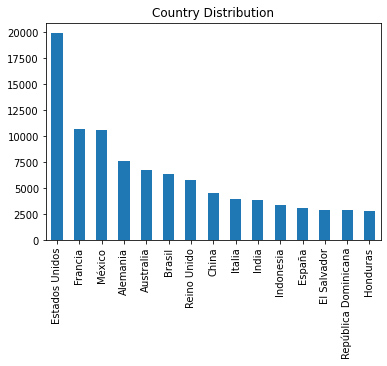

In [ ]:
train_dfo['Order Country'].value_counts().head(15).plot(kind='bar')
plt.title("Country Distribution")
plt.show()

In [ ]:
train_dfo.groupby(['Order City']).size().sort_values(ascending=False).head()

Order City
Santo Domingo    1799
New York City    1764
Los Angeles      1465
Tegucigalpa      1391
Managua          1342
dtype: int64

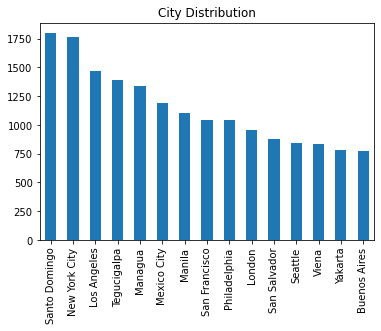

In [ ]:
train_dfo['Order City'].value_counts().head(15).plot(kind='bar')
plt.title("City Distribution")
plt.show()

In [ ]:
train_dfo.groupby(['Order Region']).size().sort_values(ascending=False).head()

Order Region
Central America    22643
Western Europe     21795
South America      12012
Oceania             8097
Northern Europe     7786
dtype: int64

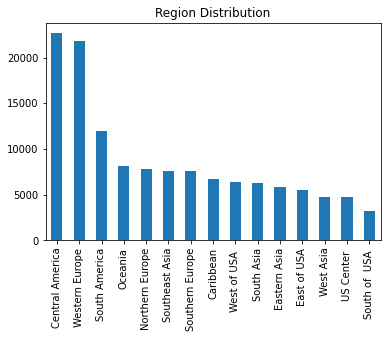

In [ ]:
train_dfo['Order Region'].value_counts().head(15).plot(kind='bar')
plt.title("Region Distribution")
plt.show()

In [ ]:
train_dfo.groupby(['Market']).size().sort_values(ascending=False).head()

Market
LATAM           41322
Europe          40205
Pacific Asia    32964
USCA            20657
Africa           9267
dtype: int64

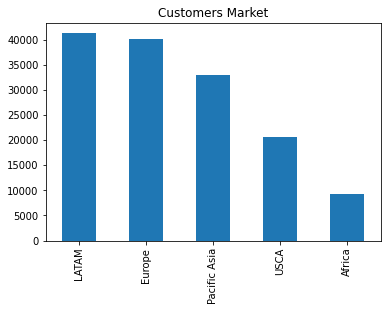

In [ ]:
train_dfo['Market'].value_counts().head().plot(kind='bar')
plt.title("Customers Market")
plt.show()

From the 4 plot above, we know that most of the sales orders come from LATAM and Europe. With distribution of the city most on Santo Domingo, even on the Country Distribution the order much likely coming from United States. The company can use this data to determine the hub location in order to speed up the delivery process, in which can prevent late fulfillment risk.

In [ ]:
train_dfo.groupby(['Category Name']).size().sort_values(ascending=False).head()

Category Name
Cleats                  19704
Men's Footwear          17831
Women's Apparel         16743
Indoor/Outdoor Games    15455
Fishing                 13884
dtype: int64

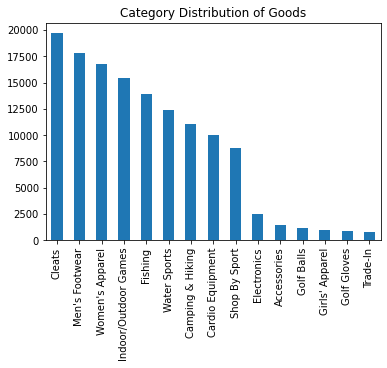

In [ ]:
train_dfo['Category Name'].value_counts().head(15).plot(kind='bar')
plt.title("Category Distribution of Goods")
plt.show()

From the summary we know that most of the category with much orders are come from Cleats, Men's Footwaear, Women's Apparel, Indoor/Outdoor Games, Fishing, Water Sports, Camping & Hiking, Cardio Equipment, and Shop By Sport. We can use this data to make a dedicated line for respective category. In which, we can design the manpower for each category line to maximize the outbound flow process.

In [ ]:
train_dfo.groupby(['Shipping Mode']).size().sort_values(ascending=False).head()

Shipping Mode
Standard Class    86248
Second Class      28234
First Class       22178
Same Day           7755
dtype: int64

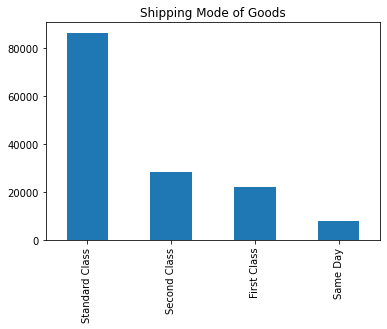

In [ ]:
train_dfo['Shipping Mode'].value_counts().head(15).plot(kind='bar')
plt.title("Shipping Mode of Goods")
plt.show()

From the plot above, we found that Standard Class Shipping Mode have most customers than other shipping mode. We can make this as a notes that customer didn't really care about shipping mode of the delivery.

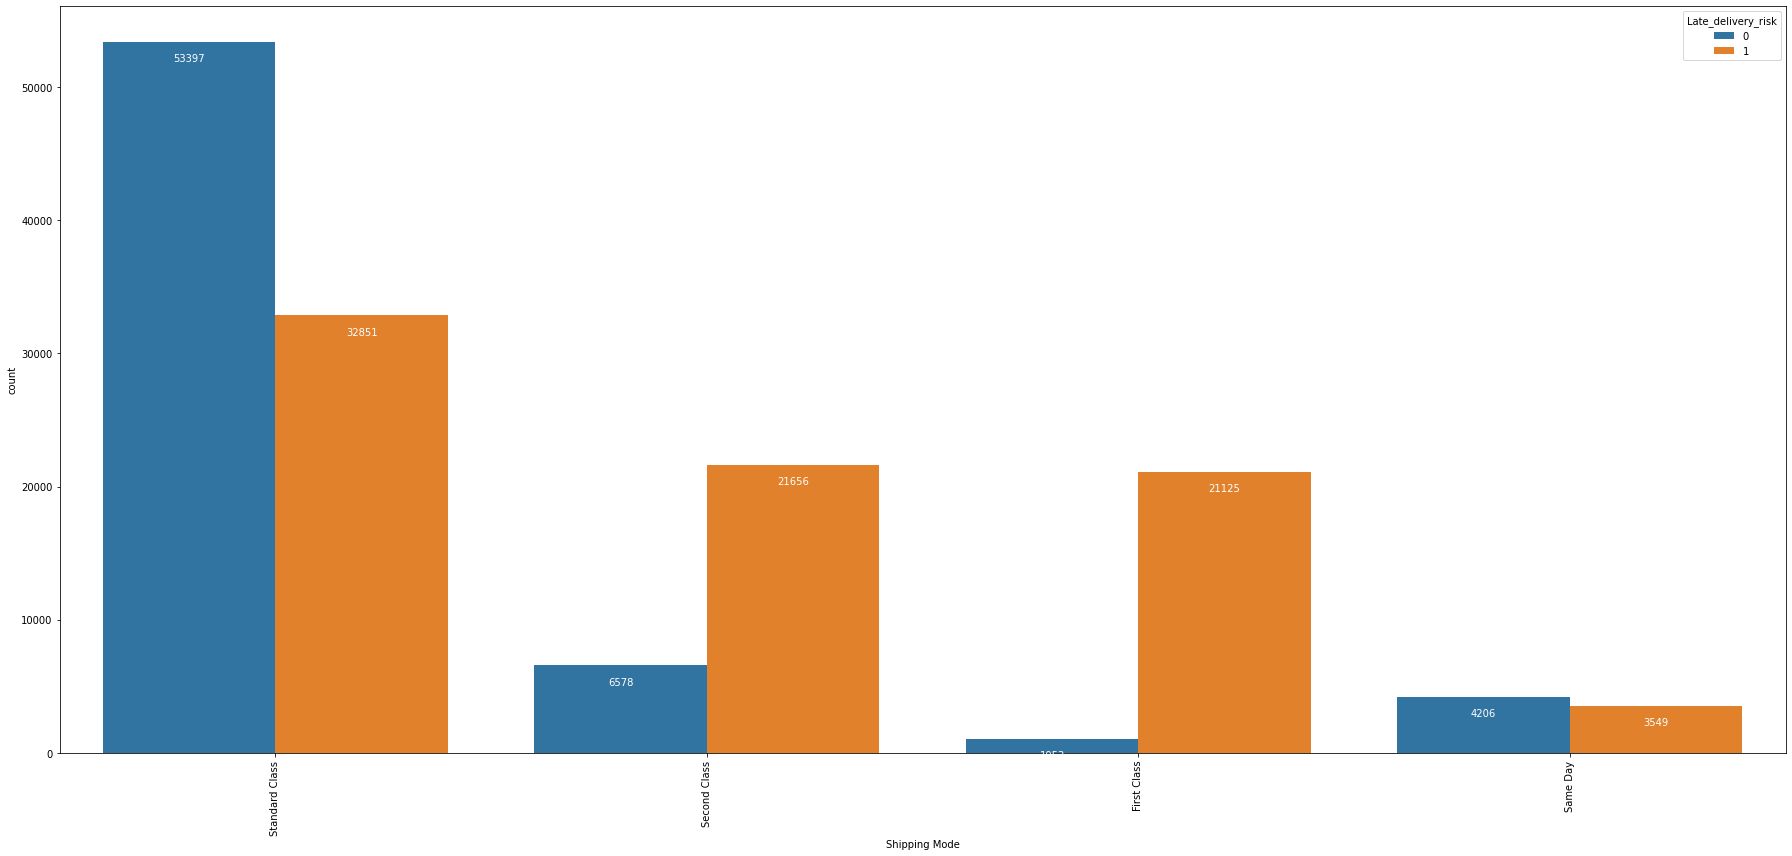

In [ ]:
# Target Feature based on Shipping Mode
plt.figure(figsize=(25,12))
ax = sns.countplot(train_dfo['Shipping Mode'], hue=train_dfo['Late_delivery_risk'], palette=palette, order = train_dfo['Shipping Mode'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
plt.xticks(rotation=90)
plt.tight_layout();

From the plot above, we know clearly that Standard Class have better performance in term of SLA. As we can see the shipping mode that lowest chance to be over SLA is Standard Class and Same Day, however we could see that Same Day service have almost 50:50 chance for late delivery service.

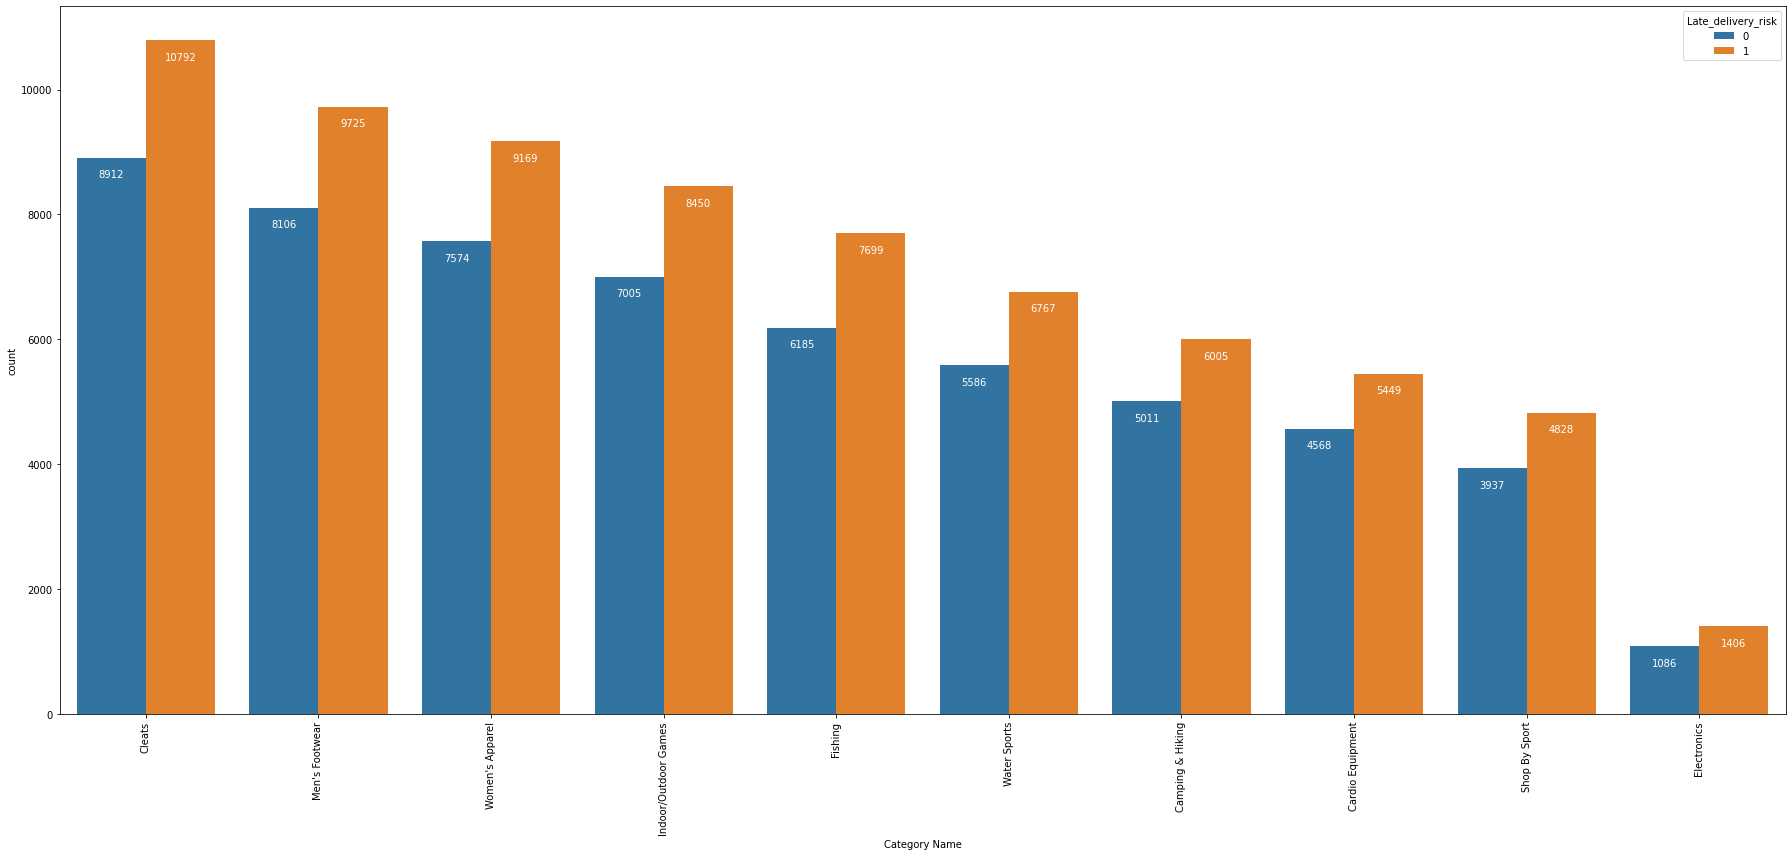

In [ ]:
# Target Feature based on Category Name
plt.figure(figsize=(25,12))
ax = sns.countplot(train_dfo['Category Name'], hue=train_dfo['Late_delivery_risk'], palette=palette, order = train_dfo['Category Name'].value_counts().head(10).index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
plt.xticks(rotation=90)
plt.tight_layout();

The Category didn’t seems very clear about determining late delivery risk. However, we know that some of category have different category movement. As we can see the more order for specific category is also more late delivery risk will show up.


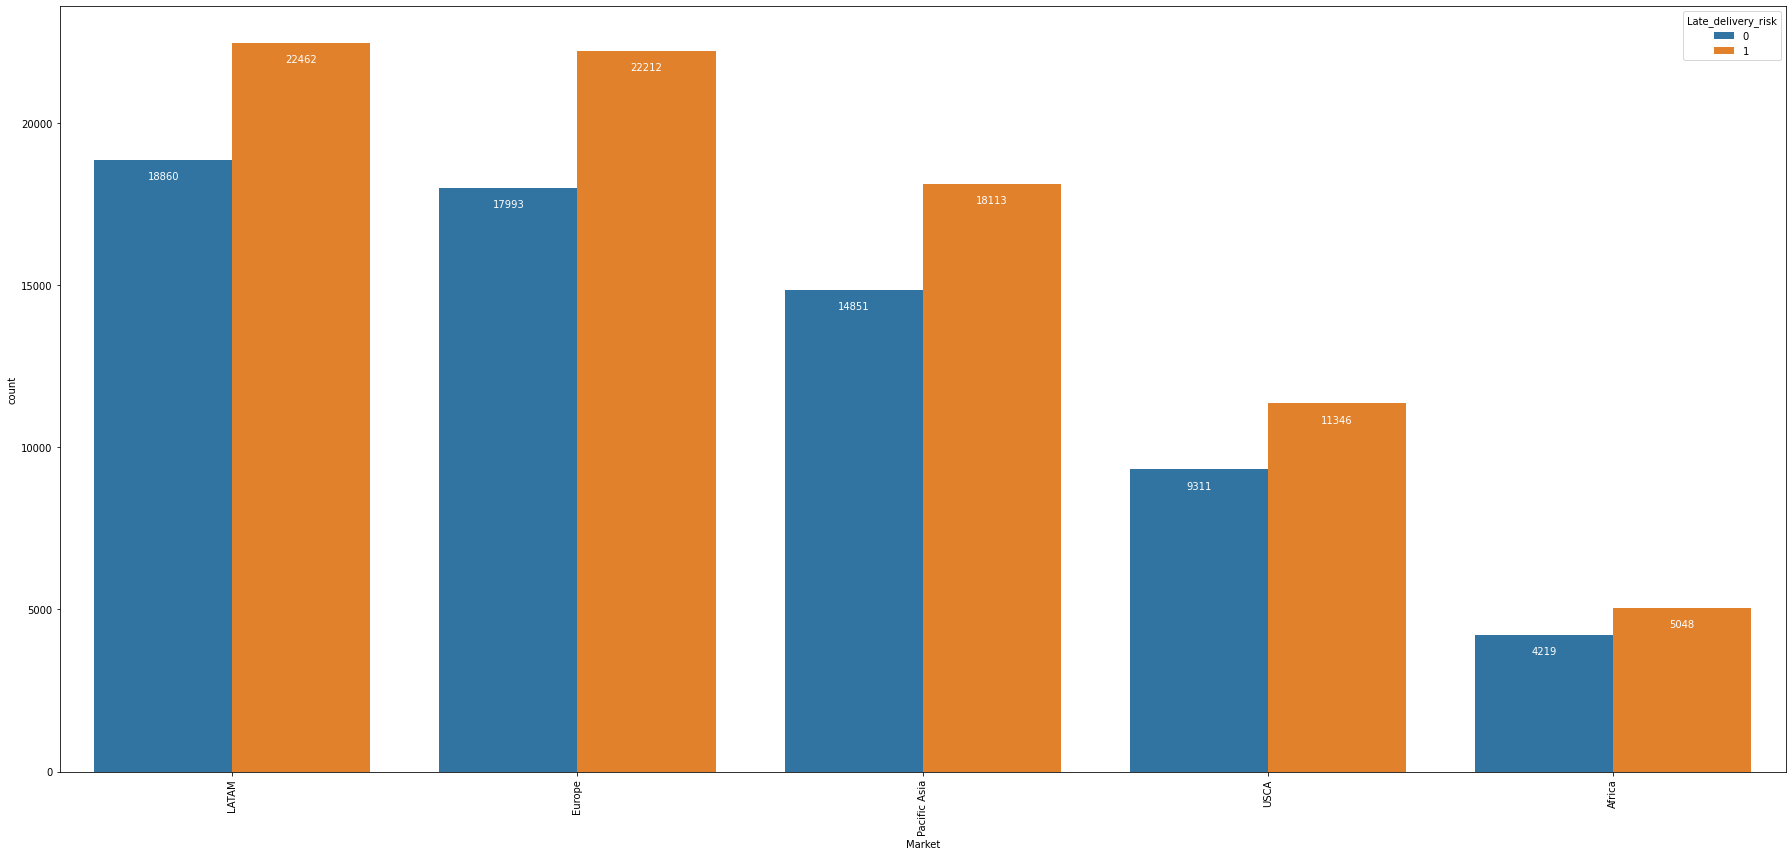

In [ ]:
# Target Feature based on Market
plt.figure(figsize=(25,12))
ax = sns.countplot(train_dfo['Market'], hue=train_dfo['Late_delivery_risk'], palette=palette, order = train_dfo['Market'].value_counts().head(10).index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
plt.xticks(rotation=90)
plt.tight_layout();

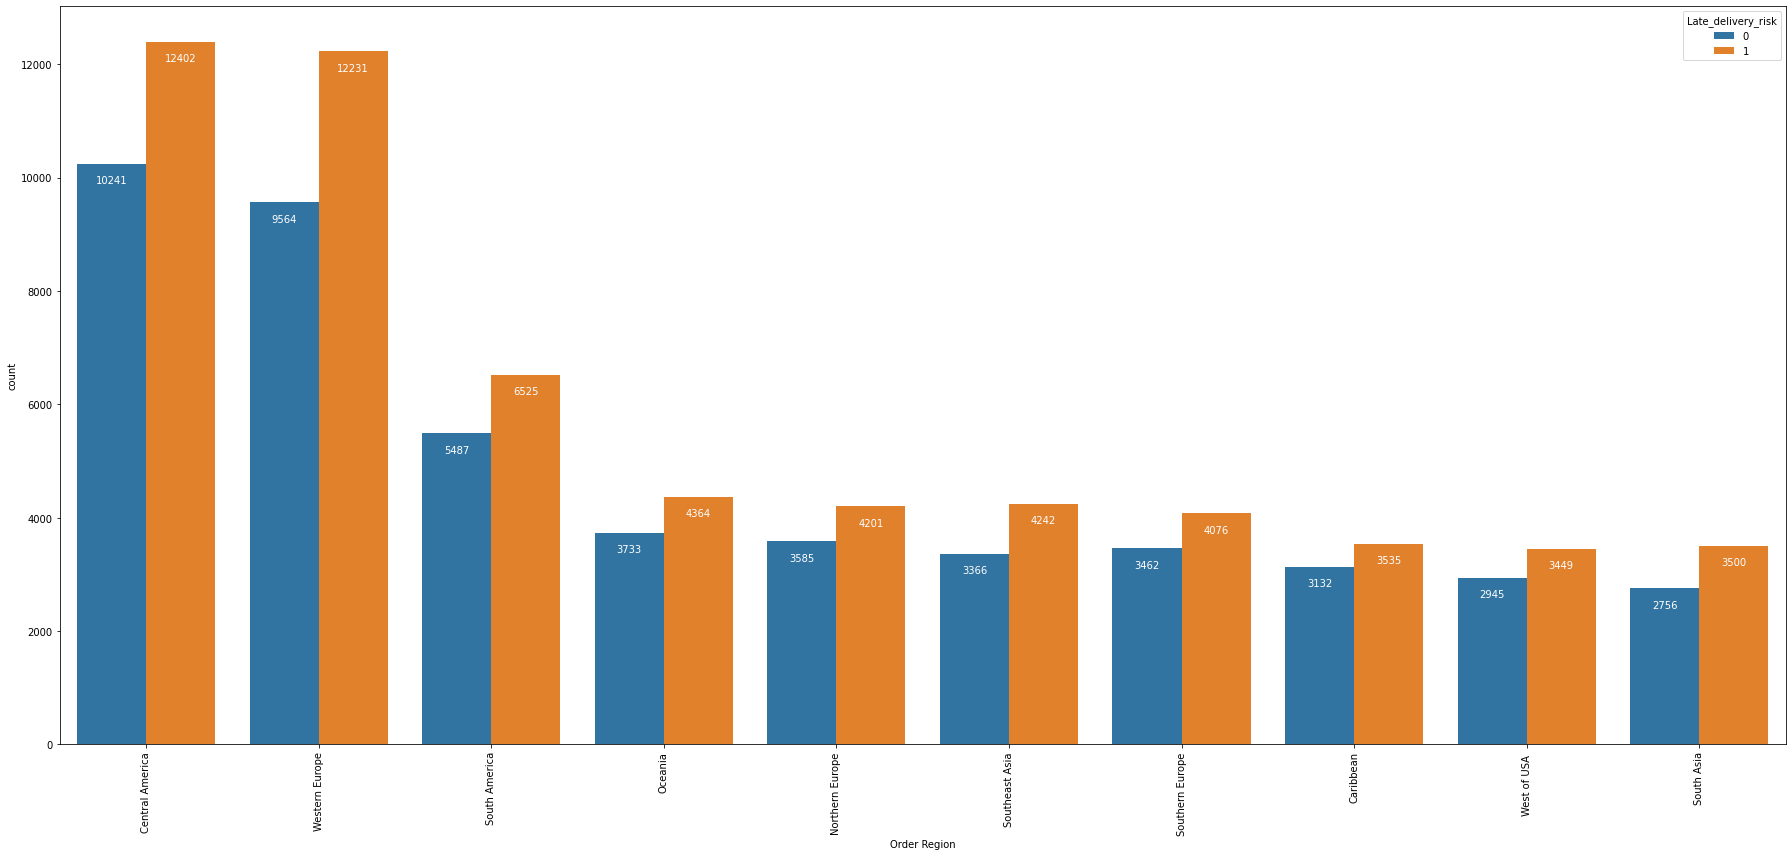

In [ ]:
# Target Feature based on Order Region
plt.figure(figsize=(25,12))
ax = sns.countplot(train_dfo['Order Region'], hue=train_dfo['Late_delivery_risk'], palette=palette, order = train_dfo['Order Region'].value_counts().head(10).index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
plt.xticks(rotation=90)
plt.tight_layout();

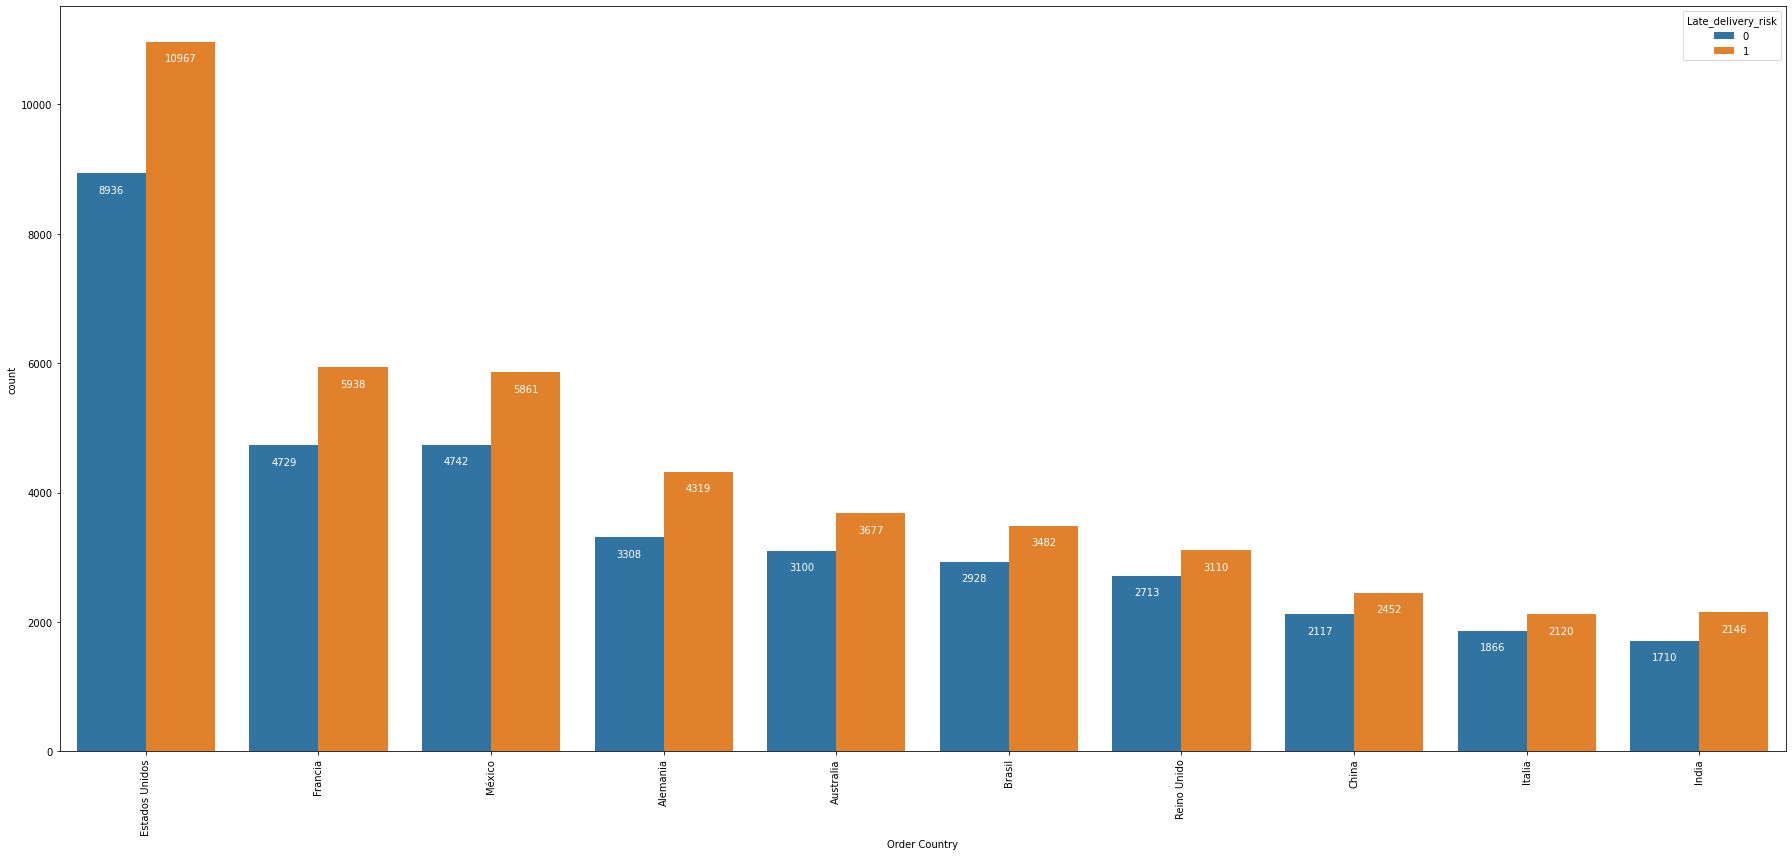

In [ ]:
# Target Feature based on Order Country
plt.figure(figsize=(25,12))
ax = sns.countplot(train_dfo['Order Country'], hue=train_dfo['Late_delivery_risk'], palette=palette, order = train_dfo['Order Country'].value_counts().head(10).index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
plt.xticks(rotation=90)
plt.tight_layout();

As we can see, there is no clear evidence that the late delivery is because of the distance between fulfillment center and the customers. However, we need further analysis is there any factors except distance that really make raise late delivery risk.


From the plot above, we know that :
* In terms of Market, Category, Region, Country all order have much chance to be Late Delivery Risk than not. So we can assume that the distance of the delivery didn't really affect the fulfillment rate.
* The Standard Class shipping mode have good performance than all other shipping mode. Same Day shipping mode have a lower chance for late delivery, however the chance is almost 50:50.

# Preprocessing

## Missing Values Handling

In [ ]:
train_dfo.isna().mean()*100

Order Id               0.0
Category Name          0.0
Market                 0.0
Order City             0.0
Order Country          0.0
Order Item Quantity    0.0
Order Region           0.0
Shipping Mode          0.0
Late_delivery_risk     0.0
dtype: float64

In [ ]:
test_dfo.isna().mean()*100

Order Id               0.0
Category Name          0.0
Market                 0.0
Order City             0.0
Order Country          0.0
Order Item Quantity    0.0
Order Region           0.0
Shipping Mode          0.0
Late_delivery_risk     0.0
dtype: float64

In [ ]:
train_dfo.isna().mean()*100

Order Id               0.0
Category Name          0.0
Market                 0.0
Order City             0.0
Order Country          0.0
Order Item Quantity    0.0
Order Region           0.0
Shipping Mode          0.0
Late_delivery_risk     0.0
dtype: float64

In [ ]:
train_dfo.isna().mean()*100

Order Id               0.0
Category Name          0.0
Market                 0.0
Order City             0.0
Order Country          0.0
Order Item Quantity    0.0
Order Region           0.0
Shipping Mode          0.0
Late_delivery_risk     0.0
dtype: float64

Luckily, there aren't null values on our dataset.

## Duplicated Value Handling

In [ ]:
train_dfo.shape

(144415, 9)

In [ ]:
train_dfo.duplicated().sum()

7426

In [ ]:
test_dfo.shape

(36104, 9)

In [ ]:
test_dfo.duplicated().sum()

482

We found that there are duplicated values on the our data (train and test), we need to handle this before going to next step. This is because some of the order id have more than one items order and thus resulting on duplicated record. We can drop the duplicate for this issue.

In [ ]:
# Drop duplicate on train data
train_dfo = train_dfo.drop_duplicates()

# Drop duplicate on train data
test_dfo = test_dfo.drop_duplicates()

## Feature Selection

For the feature selection we will drop the order id, since order id much more like identification for each order.

In [ ]:
# Drop the Order Id since it could be unique for every rows
train_dfo = train_dfo.drop(columns=['Order Id'])
test_dfo = test_dfo.drop(columns=['Order Id'])

In [ ]:
# Checking train & test
print(train_dfo.shape)
print(test_dfo.shape)

(136989, 8)
(35622, 8)


## Encoding

In [ ]:
train_dfo.head()

,Category Name,Market,Order City,Order Country,Order Item Quantity,Order Region,Shipping Mode,Late_delivery_risk
135982,Women's Apparel,Europe,Ufa,Rusia,3,Eastern Europe,Standard Class,0
143679,Indoor/Outdoor Games,Europe,Valencia,España,2,Southern Europe,First Class,1
53391,Water Sports,Europe,Mansfield,Reino Unido,1,Northern Europe,Standard Class,0
161942,Shop By Sport,USCA,San Francisco,Estados Unidos,3,West of USA,Standard Class,0
157975,Men's Footwear,Pacific Asia,Delhi,India,1,South Asia,Second Class,1


In [ ]:
train_dfo.columns

Index(['Category Name', 'Market', 'Order City', 'Order Country',
       'Order Item Quantity', 'Order Region', 'Shipping Mode',
       'Late_delivery_risk'],
      dtype='object')

For encoding phase, we use these strategies :

* Columns with high cardinality, we using frequency encoding
* Columns with binary values, we using dummy encoding

In [ ]:
# Frequency Encoding for high cardinality columns on train
col_freq = ['Category Name', 'Market', 'Order City', 'Order Country', 'Order Region', 'Shipping Mode']
for col in col_freq:
  fe = train_dfo.groupby(col).size()/len(train_dfo) # fit on data train
  train_dfo.loc[:, col] = train_dfo[col].map(fe) # transform data train
  test_dfo.loc[:, col] = test_dfo[col].map(fe) # tranform data test

In [ ]:
# Checking train & test
print(train_dfo.shape)
print(test_dfo.shape)

(136989, 8)
(35622, 8)


## Normalization

As we can observe from dataset so far, there is column like Order Quantity. For these, we using normalization in order to generalize all value into 0 ~ 1.

In [ ]:
# Transform certain columns using normalization
col_trans = ['Order Item Quantity']
scaler = MinMaxScaler()
train_dfo[col_trans] = scaler.fit_transform(train_dfo[col_trans])
test_dfo[col_trans] = scaler.transform(test_dfo[col_trans])

In [ ]:
test_dfo

,Category Name,Market,Order City,Order Country,Order Item Quantity,Order Region,Shipping Mode,Late_delivery_risk
129624,0.139420,0.278760,0.000277,0.003460,0.75,0.021323,0.597690,0
38743,0.113476,0.278760,0.001555,0.021396,0.00,0.052274,0.597690,0
97586,0.113476,0.285490,0.000504,0.073174,0.00,0.156363,0.195038,1
119329,0.139420,0.285490,0.000255,0.009957,0.50,0.083036,0.195038,1
169926,0.139420,0.142610,0.007241,0.137405,1.00,0.038288,0.195038,0
...,...,...,...,...,...,...,...,...
120765,0.113476,0.278760,0.000453,0.040536,0.00,0.053990,0.597690,0
25749,0.139420,0.278760,0.000139,0.005409,1.00,0.021323,0.153567,1
33556,0.113476,0.285490,0.001467,0.016687,0.00,0.156363,0.597690,0
6509,0.063158,0.229398,0.000161,0.031915,0.25,0.040376,0.597690,0


# Modeling Preparation

## Reseparate train_df and test_df

In [ ]:
# Check Null values
print(train_dfo.isna().sum())
print("="*10)
print(test_dfo.isna().sum())
print("="*10)

Category Name          0
Market                 0
Order City             0
Order Country          0
Order Item Quantity    0
Order Region           0
Shipping Mode          0
Late_delivery_risk     0
dtype: int64
Category Name           0
Market                  0
Order City             21
Order Country           0
Order Item Quantity     0
Order Region            0
Shipping Mode           0
Late_delivery_risk      0
dtype: int64


As we can see, there is null values created on test_dfo after encoding. We can drop these rows since it's only small percent from the data.

In [ ]:
test_dfo = test_dfo.dropna()

In [ ]:
# Rechecking
print(test_dfo.isna().sum())
print("="*10)

Category Name          0
Market                 0
Order City             0
Order Country          0
Order Item Quantity    0
Order Region           0
Shipping Mode          0
Late_delivery_risk     0
dtype: int64


In [ ]:
# Train df separation
X_train = train_dfo.drop(['Late_delivery_risk'],axis = 1)
y_train = train_dfo['Late_delivery_risk']

# Test df separation
X_test = test_dfo.drop(['Late_delivery_risk'],axis = 1)
y_test = test_dfo['Late_delivery_risk']

## Target Feature Percentage

In [ ]:
# View the percentage of target feature
target = y_train.value_counts().reset_index()
target.rename(columns={'index':'Late_delivery_risk','Late_delivery_risk':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,Late_delivery_risk,freq,percentage
0,1,75072,54.8
1,0,61917,45.2


# Modeling

## Find best models

In [ ]:
def create_models(seed=1000):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    models = []
    models.append(('Decision Tree', DecisionTreeClassifier(random_state= seed)))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('Random Forest', RandomForestClassifier(random_state = seed)))
    models.append(('XGBoost', XGBClassifier(random_state = seed)))
    
    return models

# create a list with all the algorithms we are going to assess
models = create_models()

In [ ]:
# test the F1 Score of each model using default hyperparameters
results = []
names = []
scoring = 'F1 Score'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train).predict(X_test)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate f1_score 
    f1score = f1_score(y_test, predictions)
    # append the model name and the F1 Score to the lists
    results.append(f1score)
    names.append(name)
    # print classifier F1 Score
    print('Classifier: {}, F1 Score: {})'.format(name, f1score))

Classifier: Decision Tree, F1 Score: 0.6644341737469903)
Classifier: KNN, F1 Score: 0.6803956881476261)
Classifier: Random Forest, F1 Score: 0.6878284410000531)
Classifier: XGBoost, F1 Score: 0.6633660283356686)


In [ ]:
for name,model in models:
  model.fit(X_train, y_train).predict(X_test)
  predictions = model.predict(X_test)
  print('='*75)
  print('Classifier: {}'.format(name))
  print(pd.DataFrame(classification_report(y_test, predictions, target_names=['not late','late'], output_dict=True)))

Classifier: Decision Tree
               not late          late  accuracy     macro avg  weighted avg
precision      0.603155      0.723961   0.65942      0.663558      0.669501
recall         0.714811      0.613953   0.65942      0.664382      0.659420
f1-score       0.654253      0.664434   0.65942      0.659344      0.659845
support    16049.000000  19552.000000   0.65942  35601.000000  35601.000000
Classifier: KNN
               not late          late  accuracy     macro avg  weighted avg
precision      0.612945      0.694739  0.656049      0.653842      0.657866
recall         0.643155      0.666633  0.656049      0.654894      0.656049
f1-score       0.627687      0.680396  0.656049      0.654041      0.656635
support    16049.000000  19552.000000  0.656049  35601.000000  35601.000000
Classifier: Random Forest
               not late          late  accuracy     macro avg  weighted avg
precision      0.622661      0.714885  0.669616      0.668773      0.673310
recall         0.677

From the summary above, the best model in the term of F1-Score is Random Forest. Therefore, we are going to use this model for prediction.

## Modelling with Best Model

In [ ]:
# define KNN
rf = RandomForestClassifier(random_state = 1000)

# fit model to data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1000)

## Evaluation

In [ ]:
# predict
pred_result = rf.predict(X_test)
pred_proba_result = rf.predict_proba(X_test)

In [ ]:
# check classification report result
pd.DataFrame(classification_report(y_test, pred_result, target_names=['not late','late'], output_dict=True))

,not late,late,accuracy,macro avg,weighted avg
precision,0.622661,0.714885,0.669616,0.668773,0.673310
recall,0.677986,0.662745,0.669616,0.670366,0.669616
f1-score,0.649147,0.687828,0.669616,0.668488,0.670391
support,16049.000000,19552.000000,0.669616,35601.000000,35601.000000


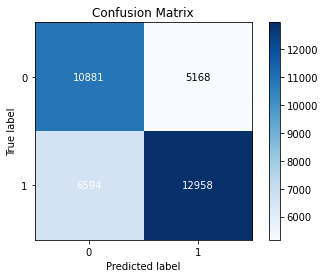

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);

The confusion matrix show :

* The model predicted delivery will be late and actually late is 12958. (True Positive)
* The model predicted delivery will not late and actually late is 6394. (False Negative)
* The model predicted delivery will late and actually not is 5168. (False Positive)
* The model predicted delivery will not late and actually not late is 10881. (True Negative)


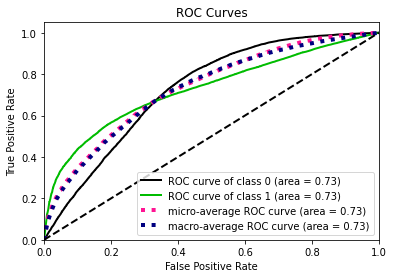

In [ ]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test, pred_proba_result);

From the plot above, we know that our model success rate in distinct True Positive and True Negative is 73%.

In [ ]:
# check f1-score
f1_score(y_test, pred_result)

0.6878284410000531

As a result, the harmony between precision and recall is 68.7%.

## Interpretation

In [ ]:
# initiate explainer for rf model
conv_rf_exp = dx.Explainer(rf, X_train, y_train, label = "Random Forest Interpretation")

Preparation of a new explainer is initiated

  -> data              : 136989 rows 7 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 136989 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest Interpretation
  -> predict function  : <function yhat_proba_default at 0x7febb7b3d4d0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.548, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.955, mean = -0.000128, max = 0.933
  -> model_info        : package sklearn

A new explainer has been created!


In [ ]:
# visualize permutation feature importance for Random Forest model
conv_rf_exp.model_parts().plot()

From the feature importance, we know that the highest four importance variable to determine late delivery risk is :
* Shipping Mode
* Order City
* Category Name
* Order Item Quantity

In [ ]:
# create partial dependence plot of RF model
conv_rf_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


From the partial dependence plot, we know that even there are many factor that impact late delivery, the higher effect comes from shipping mode. We know that if the more shipping mode get used by the company, the higher chance that the delivery will be on time.

# Recommendation

From the EDA and maching learning modelling, can formulate recommendation like :
* Check the possibility of closing few of Shipping mode. We found that the Standard Class have best performance amongst all, so we can recommend this shipping mode for customer. We can also opening partnership with third-party courier with more sorting hub since we know where the potential orders comes from.
* Doing more analysis for characteristic of the customer city. From the modelling we know that city more important than country and region in terms of predicting late delivery risk. Therefore, there is possibility that the distance is not so important. How about the road condition? Weather climate? or anything else that can determine late delivery risk on potential city.
* Initiate movement grouping for all Category. From the modelling we know that Category is also have higher importance in determine SLA. Therefore, we can make movement grouping to FAST, MED, and SLOW movement for the Category that company handle. So we can prepare the more effective layout for outbound staging to minimize the lead time for order processing.
* Calculate manpower more efficiently. As we can see, the order quantity is also one of important feature. The company can calculate several point and analyze the possibility where the most needed for additional manpower. Also we can add the facility to maximize the productivity like conveyor belt so the picker could deliver the goods to packing station without actually walking there.